<a href="https://colab.research.google.com/github/AlmondSund/SyS_2025_2/blob/main/Taller1_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

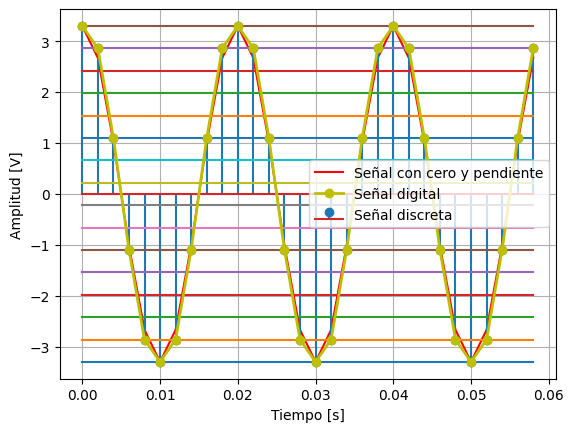

In [12]:
"""
4. Discretización de señales
=========================================================
Se tiene un microprocesador de 4 bits con entrada análoga
entre -3.3 y 3.3 [V]. Describa las condiciones necesarias
para que el microprocesador pueda digitalizar la señal

x(t) = 30cos(100πt).

Presente una simulación en Python de dicho proceso para
tres ciclos de la señal x(t).
Nota: Ver cuaderno 1_IntroNumpy_SyS.ipynb
"""

import numpy as np                         # Para cálculos numéricos
import matplotlib.pyplot as plt            # Para gráficos
from scipy.spatial.distance import cdist   # Para cálculo de distancias

def zeroAndSlope(x, y_min = -3.3, y_max = 3.3):
    x_max = max(x)
    x_min = min(x)

    m = (y_max - y_min) / (x_max - x_min) # Pendiente
    b = y_max - m * x_max                 # Intersección con y (cero/offset)

    return m*x + b

def quantizer(point_to_quantize, vector_levels):
    n_levels = vector_levels.shape[0] # Tamaño del vector de niveles
    #distancia del punto a cuantizar al vector de niveles, reshape(-1, 1) asegura vectores columna para poder usar cdist
    distances = cdist(point_to_quantize.reshape(-1, 1), vector_levels.reshape(-1, 1))
    index = np.argmin(distances) # Índice del nivel más cercano

    return vector_levels[index]

# Señal original:
A = 30.0                            # Amplitud [V]
Fo = 50.0                           # Frecuencia [Hz] (100π rad/s -> 50 Hz)
To = 1.0/Fo                         # Periodo [s]
duration = 3*To                     # 3 ciclos de la señal (duración de la simulación) [s]
Fs = 10*Fo                          # Asegurar Nyquist: Fs > 2*Fo [Hz]
Ts = 1.0/Fs
tk = np.arange(0, duration, Ts)     # Vector de tiempos muestreados [s]
signal = A*np.cos(2*np.pi*Fo*tk)    # Acos(2πFot) [V]

# Cero y pendiente para encajar en el rango del A/D
signal_zs = zeroAndSlope(signal)

# Número de bits y vector de cuantización
num_bits = 4
levels = 2**num_bits
quantization_levels = np.linspace(-3.3, 3.3, levels)

# Distancias y cero pendiente a vector de cuantización
distances = cdist(signal_zs.reshape(-1, 1), quantization_levels.reshape(-1, 1)) # Se utiliza reshape(-1, 1) para generar vectores columna como lo pide cdist
distances.shape # distances es una matriz de (len(signal_zs), len(quantization_levels)), ej: la fila 1 incluye la distancia euclidiana entre signal_zs[0] y todos los niveles de cuantización

# Se requiere identificar el índice del nivel de cuantización más cercano a cada muestra de signal_zs
indexes = np.argmin(distances, axis=1) # axis=1 para obtener el índice del mínimo en cada fila (mínimo por muestra de signal_zs)
indexes

for i in range(signal_zs.shape[0]):
    if i == 0:
        quantized_signal = quantizer(signal_zs[i], quantization_levels)
    else:
        quantized_signal = np.append(quantized_signal, quantizer(signal_zs[i], quantization_levels))

# Gráficas
plt.plot(tk, signal_zs, c='r', label='Señal con cero y pendiente')
plt.stem(tk, quantized_signal, label='Señal discreta')

# Niveles de cuantización
for level in quantization_levels:
    plt.plot(tk, level*np.ones(len(tk)))

# Señal digital (discreta + cuantizada)
plt.plot(tk, quantized_signal, c='y', marker='o', label='Señal digital', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.show()